# 개요 

### Author : HYGN

### 긴급재난지원금의 목적 
  
    : 코로나19 장기화로 어려움을 겪는 국민에 대한 다층적이고 시급한 지원.
    : '국민생활 안정'과 '경제회복 지원'.

### KOSIS 코로나 19 월별통계표 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_COVID19_005_M

# Data 소개   

    YM : 기준년월   
    SIDO : 지역대분류명   
    SIGUNGU : 지역중분류명   
    FranClass : 소상공인구분   
    Type : 업종명   
    Time : 시간대   
    TotalSpent : 총사용금액(재난지원금 포함)
    DisSpent : 재난지원금 사용금액   
    NumOfSpent : 총 이용건수   
    NumOfDisSpent : 총 재난지원금 이용건수   
    POINT_X, POINT_Y : X,Y 좌표   


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [4]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
os.chdir("../../data/kri-dac-jeju")

In [6]:
import glob

path = "./*.txt"
flist = glob.glob(path)
flist = sorted(flist)
flist

['./KRI-DAC_Jeju_data5.txt',
 './KRI-DAC_Jeju_data6.txt',
 './KRI-DAC_Jeju_data7.txt',
 './KRI-DAC_Jeju_data8.txt']

## 5월

In [7]:
dat5 = pd.read_csv(flist[0])
dat5.columns = dat5.columns.str.lower()
dat5.shape

(273183, 14)

## 6월

In [8]:
dat6 = pd.read_csv(flist[1])
dat6.columns = dat6.columns.str.lower()
dat6.shape

(281896, 14)

## 7월

In [9]:
dat7 = pd.read_csv(flist[2])
dat7.columns = dat7.columns.str.lower()
dat7.shape

(284265, 16)

## 8월

In [10]:
dat8 = pd.read_csv(flist[3])
dat8.columns = dat8.columns.str.lower()
dat8.shape

(280085, 14)

## 자료 key값

: 동일한 지점좌표에 여러 업종이 기록되어 있었습니다. 이는 한 건물 내에 여러 업종이 자리하고 있어 그런 것으로 보이며, 자료들의 구분 key값을 (업종,x,y)를 이용하는게 적합하다고 생각합니다.

In [11]:
dat5[dat5['point_x']==877005.9834].head(10)

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1479766.073
4903,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1479766.073
8568,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1479766.073
11269,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1479766.073
19121,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1479766.073
23348,23349,23349,202005,제주특별자치도,제주시,영세,의원,08시,1500,0,1,0,877005.9834,1479766.073
23349,23350,23350,202005,제주특별자치도,제주시,중소,한의원,08시,24000,0,10,0,877005.9834,1479766.073
30280,30281,30281,202005,제주특별자치도,제주시,영세,의원,09시,98000,33000,3,2,877005.9834,1479766.073
30281,30282,30282,202005,제주특별자치도,제주시,중소,한의원,09시,10000,0,2,0,877005.9834,1479766.073
40793,40794,40794,202005,제주특별자치도,제주시,영세,의원,10시,70500,1500,3,1,877005.9834,1479766.073


## 자료 병합

: 5~8월까지의 시간적 변화를 같이 고려하기 위해 모든 자료를 병합하여 이용하였습니다.

In [12]:
spent = ['totalspent','disspent','numofspent','numofdisspent']
keyvar = ['type','time','point_x','point_y']
idvar = ['objectid','field1','sigungu','franclass']

In [13]:
tmp1 = dat5.merge(dat6[keyvar+spent],on=keyvar,suffixes=['_5','_6'],how='inner')
tmp2 = dat7[keyvar+spent].merge(dat8[keyvar+spent],on=keyvar,suffixes=['_7','_8'],how='inner')

tmp = tmp1.merge(tmp2,on=keyvar,how='inner')
tmp = tmp.drop('sido',axis=1)
tmp.head()

del tmp1,tmp2

In [14]:
tmp.shape

(454728, 25)

In [15]:
print(tmp['time'].unique())

['00시' '01시' '02시' '03시' '04시' '05시' '06시' '07시' '08시' '09시' '10시' '11시'
 '12시' '13시' '14시' '15시' '16시' '17시' '18시' '19시' '20시' '21시' '22시' '23시'
 'x시']


: 'x시'의 경우, 별도 승인없이 결제되는 건을 의미합니다.

### 결측값 확인

In [16]:
import missingno

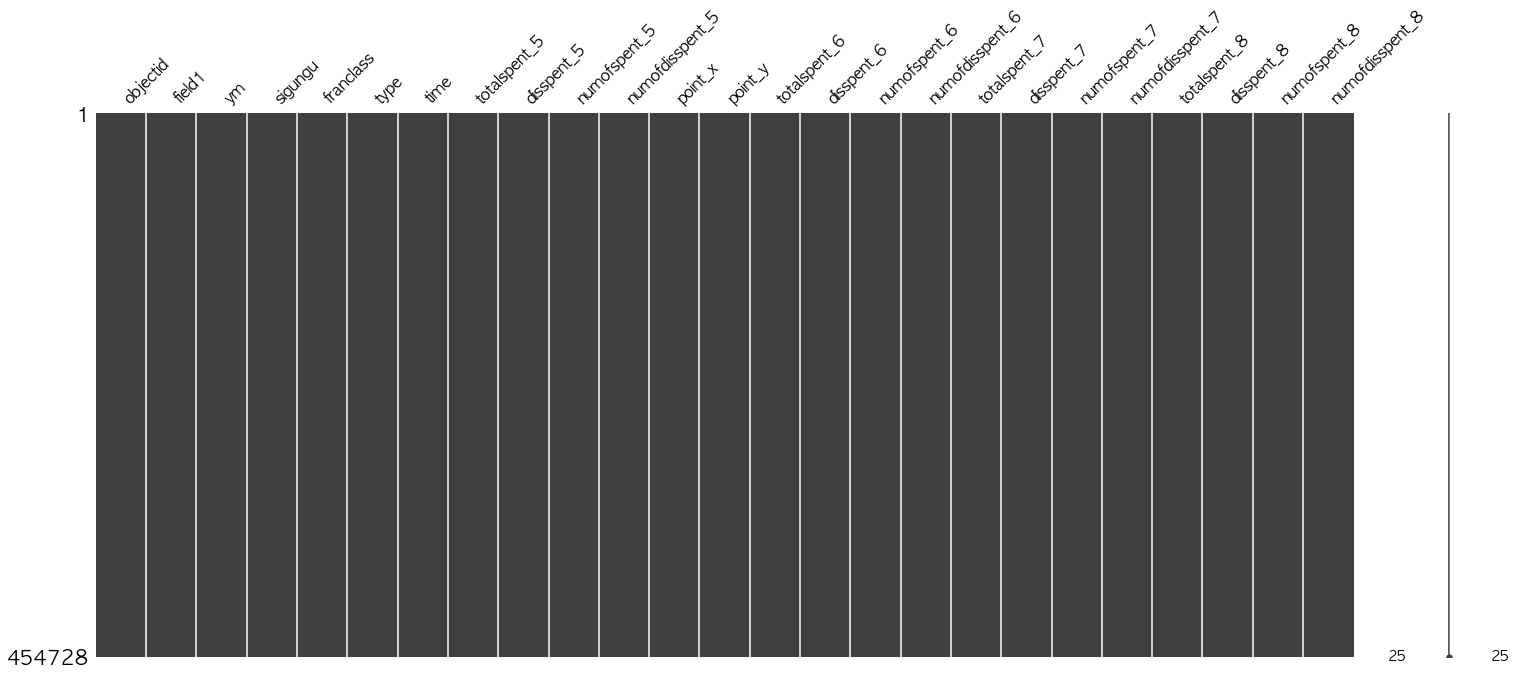

In [17]:
missingno.matrix(tmp);

## 재난지원금 총 사용금액

: "사람들은 재난지원금을 어떤 업종에 가장 많이 사용했을까?"

In [18]:
var1=[]
var2=[]
var3=[]
var4=[]
for i in range(5,9):
    var1.append("_".join(["disspent",str(i)]))
    var2.append("_".join(["totalspent",str(i)]))
    var3.append("_".join(["numofdisspent",str(i)]))
    var4.append("_".join(["numofspent",str(i)]))

In [19]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum')

In [20]:
df_month = df1.apply(np.sum,axis=0)

In [21]:
tot_disspent = np.sum(df_month[:4])
tot_numofdisspent = np.sum(df_month[4:8])
tot_numofspent = np.sum(df_month[8:12])
tot_spent = np.sum(df_month[12:16])

In [22]:
df1 = tmp.pivot_table(index=['type'],values=var1+var2+var3+var4,aggfunc='sum')
tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1[tmp1 != 0]

tmp1 = tmp1/tot_disspent  
tmp1 = pd.concat([tmp1[tmp1>0.015],pd.Series(1-np.sum(tmp1[tmp1>0.015].values),index=['etc'])])

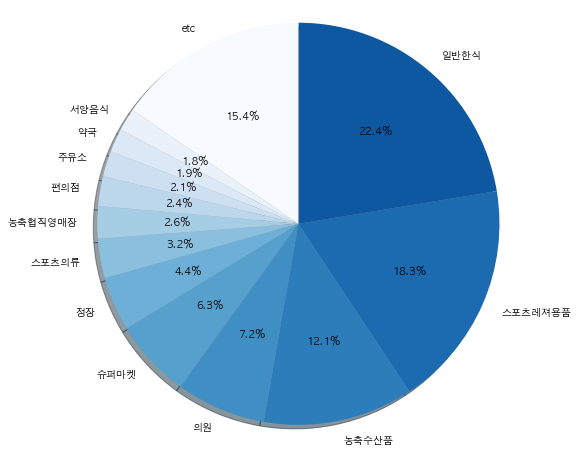

In [23]:
cmap = plt.get_cmap("Blues")
colors = cmap(sorted(np.arange(13)*18,reverse=True))

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(tmp1,labels=tmp1.index, autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False,colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

: 제주도의 5~8월 (1차)재난지원금의 사용처를 확인한 결과, 음식&식품 관련 업종에서 재난지원금 총 사용금액의 약 47.6%가 사용되었습니다. 

: 이와 관련된 [기사](https://www.hankyung.com/economy/article/202008249143i) 중 에서는 재난지원금이 먹거리 지출에 사용된 현상에 대해, "지원금으로 농식품을 구매한만큼 기존 지출을 줄였을 것이란 분석이다. 결국 재난지원금이 새로운 소비를 일으키지 못하고 기존 소비를 대체하는 정도에 그쳤다고 해석할 수 있다."라는 의견이 있습니다.

In [24]:
tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=True)
pd.DataFrame(tmp1[tmp1!=0][:10],columns=['disspent'])

,disspent
type,
택시,8500
기타광학품,9600
견인서비스,32500
학습지교육,51580
기타교통수단,90000
유아원,105110
산후조리원,112350
신변잡화수리,190000
과학기자재,208000


: 재난지원금 총 사용금액이 낮은 업종의 경우, 대부분 실생활 이외의 부가적인 지출에 대한 업종이 많아보입니다.

## 업종별 총 사용금액 대비 재난지원금 사용금액 비율
: "총 사용금액 대비 재난지원금이 차지하는 비중이 어떻게 될까?"

### 상위 15개 업종

In [25]:
tmp1 = tmp.pivot_table(index=['type'],values=var1+var2+var3+var4)

df1 = (tmp1.loc[:,var1].apply(np.sum,axis=1)/tmp1.loc[:,var2].apply(np.sum,axis=1)).sort_values(ascending=False)[:15]
df1 = pd.DataFrame(df1,columns=['prop'])

df2 = (tmp1.loc[:,var1[:2]].apply(np.sum,axis=1)/tmp1.loc[:,var2[:2]].apply(np.sum,axis=1)).sort_values(ascending=False)[:15]
df2 = pd.DataFrame(df2,columns=['prop'])

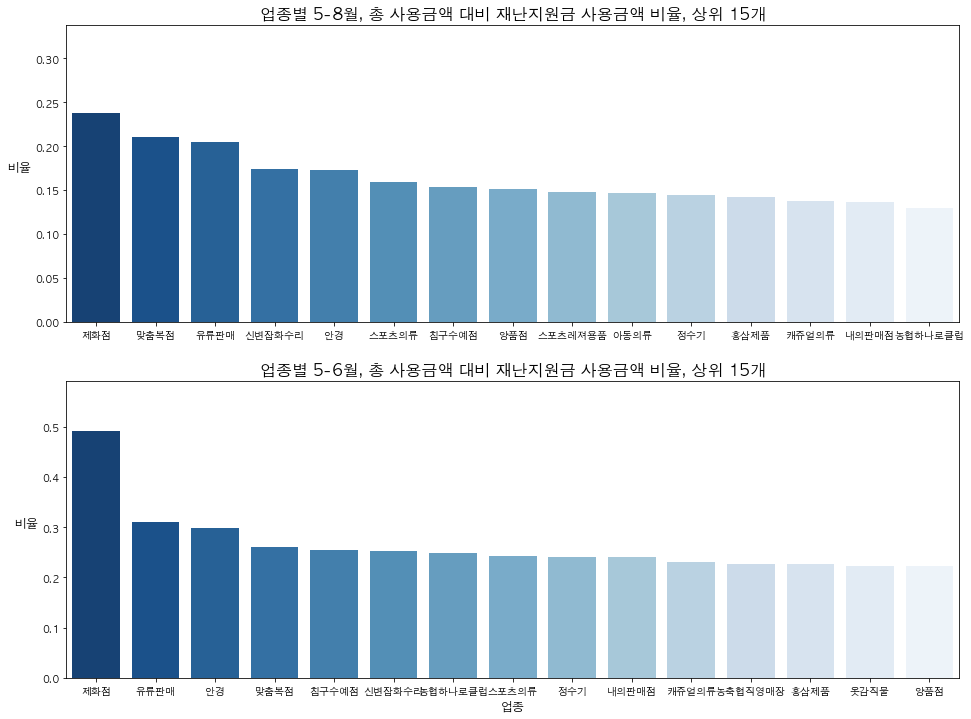

In [26]:
fig,ax = plt.subplots(2,1,figsize=(16,12))

sns.barplot(x=df1.index,y=df1['prop'],ax=ax[0],palette="Blues_r")
ax[0].set_xlabel("")
ax[0].set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax[0].set_xticklabels(df1.index,{'fontsize':10,'rotation':0,'ha':'center'})
ax[0].set_title("업종별 5-8월, 총 사용금액 대비 재난지원금 사용금액 비율, 상위 15개",{'fontsize':16})
ax[0].set_ylim([0,df1['prop'].max()+0.1]);

sns.barplot(x=df2.index,y=df2['prop'],ax=ax[1],palette="Blues_r")
ax[1].set_xlabel("업종",{'fontsize':12,'va':'top'})
ax[1].set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax[1].set_xticklabels(df2.index,{'fontsize':10,'rotation':0,'ha':'center'})
ax[1].set_title("업종별 5-6월, 총 사용금액 대비 재난지원금 사용금액 비율, 상위 15개",{'fontsize':16})
ax[1].set_ylim([0,df2['prop'].max()+0.1]);

: 그림은 상위 15개 업종의 5-8월(위)/5-6(아래) 총 사용금액 대비 재난지원금 사용금액 비율을 나타낸 그림입니다. 

: '의류','신발' 관련 업종에서 총 사용금액 대비 재난지원금의 사용금액 비중이 높았습니다. 

### 하위 15개 업종

In [27]:
tmp1 = tmp.pivot_table(index=['type'],values=var1+var2+var3+var4)

df1 = (tmp1.loc[:,var1].apply(np.sum,axis=1)/tmp1.loc[:,var2].apply(np.sum,axis=1)).sort_values(ascending=True)
df1 = pd.DataFrame(df1,columns=['prop'])
df1 = df1[df1['prop']!=0][0:15]

df2 = (tmp1.loc[:,var1[:2]].apply(np.sum,axis=1)/tmp1.loc[:,var2[:2]].apply(np.sum,axis=1)).sort_values(ascending=True)
df2 = pd.DataFrame(df2,columns=['prop'])
df2 = df2[df2['prop']!=0][0:15]

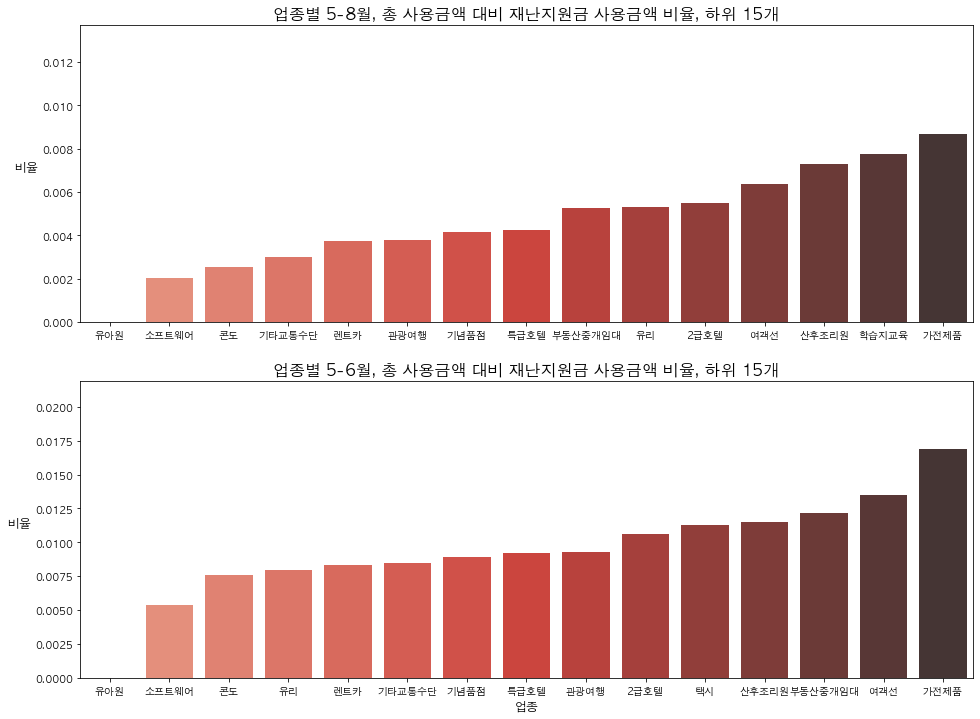

In [28]:
fig,ax = plt.subplots(2,1,figsize=(16,12))

sns.barplot(x=df1.index,y=df1['prop'],ax=ax[0],palette="Reds_d")
ax[0].set_xlabel("")
ax[0].set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax[0].set_xticklabels(df1.index,{'fontsize':10,'rotation':0,'ha':'center'})
ax[0].set_title("업종별 5-8월, 총 사용금액 대비 재난지원금 사용금액 비율, 하위 15개",{'fontsize':16})
ax[0].set_ylim([0,df1['prop'].max()+0.005]);

sns.barplot(x=df2.index,y=df2['prop'],ax=ax[1],palette="Reds_d")
ax[1].set_xlabel("업종",{'fontsize':12,'va':'top'})
ax[1].set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax[1].set_xticklabels(df2.index,{'fontsize':10,'rotation':0,'ha':'center'})
ax[1].set_title("업종별 5-6월, 총 사용금액 대비 재난지원금 사용금액 비율, 하위 15개",{'fontsize':16})
ax[1].set_ylim([0,df2['prop'].max()+0.005]);

: 총 사용금액 대비 재난지원금 사용금액 비율, 하위 15개 업종은 위와 같았습니다 (5-8월(위)/5-6(아래)).

## '일반한식' , 월별 경향성 확인

: 재난지원금의 사용금액이 가장 많았던 '일반한식'업종에 대해서 알아봤습니다. 

In [29]:
def fig_timevarying(types,varname,gtype='line',**kwargs):
    df = tmp[(tmp['type']==types)].pivot_table(index='time',values=varname,aggfunc='mean').reset_index()
    if(gtype=='line'):
        sns.lineplot(data=df.melt(id_vars=['time']),x='time',y='value',hue='variable',**kwargs);
    if(gtype=='bar'):
        sns.barplot(data=df.melt(id_vars=['time']),x='time',y='value',hue='variable',**kwargs);

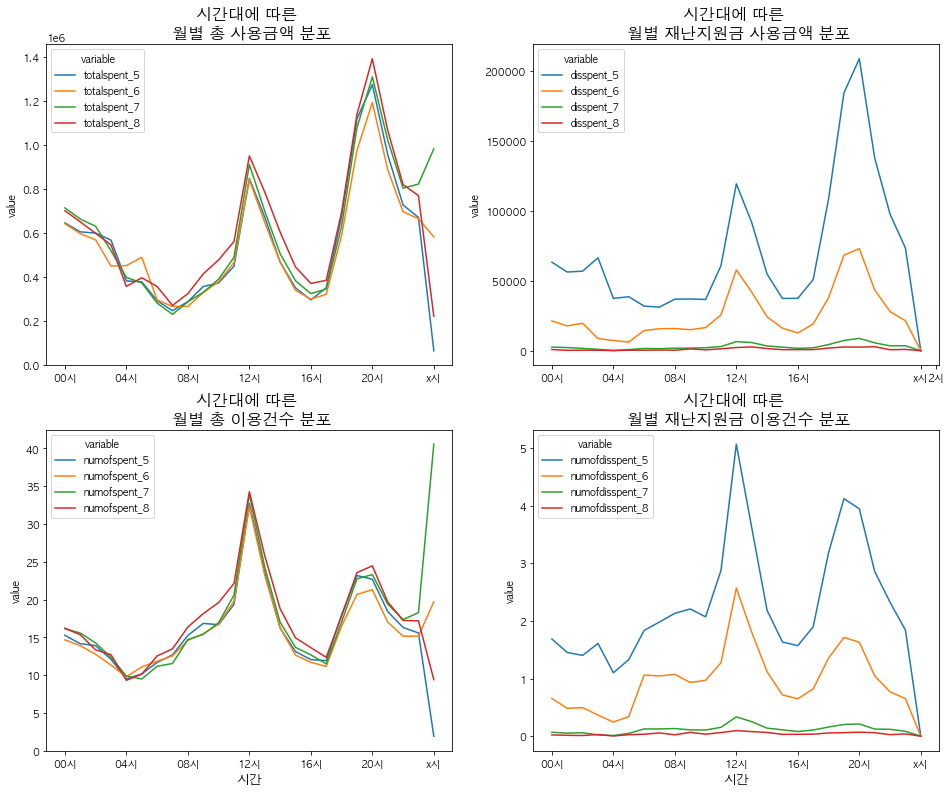

In [30]:
fig,axes = plt.subplots(2,2,figsize=(16,13))
fig_timevarying('일반한식',var1,ax=axes[0,1])
fig_timevarying('일반한식',var2,ax=axes[0,0])
fig_timevarying('일반한식',var3,ax=axes[1,1])
fig_timevarying('일반한식',var4,ax=axes[1,0])

axes[0,0].set_title('시간대에 따른 \n 월별 총 사용금액 분포',{'fontsize':16})
axes[0,1].set_title('시간대에 따른 \n 월별 재난지원금 사용금액 분포',{'fontsize':16})
axes[1,0].set_title('시간대에 따른 \n 월별 총 이용건수 분포',{'fontsize':16})
axes[1,1].set_title('시간대에 따른 \n 월별 재난지원금 이용건수 분포',{'fontsize':16})

axes[0,0].set_xticks(['00시','04시','08시','12시','16시','20시','x시'])
axes[0,1].set_xticks(['00시','04시','08시','12시','16시','2시','x시'])
axes[1,0].set_xticks(['00시','04시','08시','12시','16시','20시','x시'])
axes[1,1].set_xticks(['00시','04시','08시','12시','16시','20시','x시'])

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("시간",{'fontsize':13})
axes[1,1].set_xlabel("시간",{'fontsize':13})


plt.show()

: 위 그림은 '일반한식'업종의 월별 시간대에 따른 평균 '총 사용금액'(top-left), '재난지원금사용금액'(top-right), '총 이용건수'(bottom-left), '총 재난 지원금 이용건수'(bottom-right) 입니다.

: '일반한식'의 경우, 5월과 6월의 재난지원금이 활발하게 사용한 것으로 보이고, 점심시간(12시-13시)과 저녁시간(19시-20시)에 이용건수와 금액이 높게 나타납니다. 

: 전체 사용금액과 이용건수의 패턴은 5~8월까지 경향성이 비슷합니다. 

: 전체적인 경향은 유사하지만 재난지원금의 사용이 5-6월에 활발하므로, 7-8월과의 비교를 통해 어떤 정보를 얻을 수 있을지 생각하고 있습니다.

## 업종별, 월별 경향성 확인
: 위 그래프를 기반으로 업종별, 월별 시간대에 따른 경향성을 확인하는 그래프를 일반화해서 그렸습니다.

**※ 아래 그림은 local환경에서 실행됩니다. 결과를 확인하고 싶으시면 번거로우시겠지만 다운로드 후 실행 부탁드립니다.**



In [31]:
!jupyter nbextension enable --user --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [32]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
cf.go_offline(connected=True)

In [33]:
dict_var = {'Total_spent':var2,'Dis_spent':var1,'Num_of_spent':var4,'Num_of_disspent':var3}

In [34]:
@interact
def timevarying_plot(Type=sorted(list(tmp['type'].unique())) ,
                 Group=list(dict_var.keys()),
                 Plot_type=['line','bar']
                 ):
    df = tmp[(tmp['type']==Type)].pivot_table(index='time',values=var1+var2+var3+var4,aggfunc='mean').reset_index()
    df.iplot(kind=Plot_type, x='time', y=dict_var[Group],
            xTitle='시간대',yTitle=f'{Group}',
             title = f" '{Type}'의 시간대별 '{Group}'") 

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…

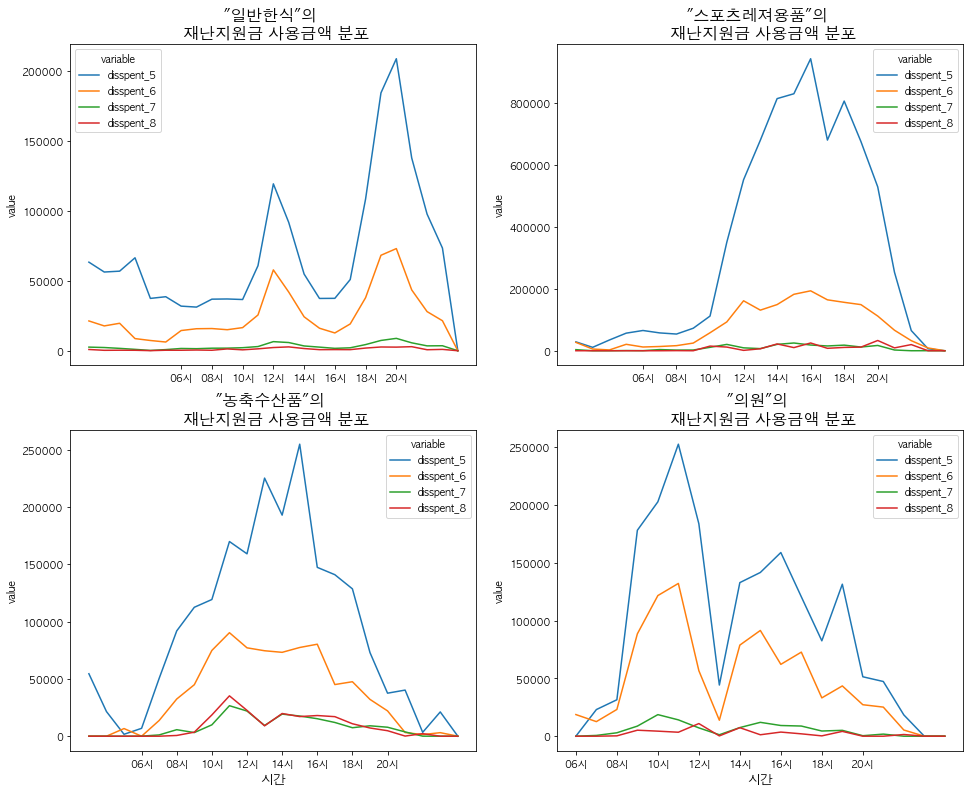

In [35]:
fig,axes = plt.subplots(2,2,figsize=(16,13))
fig_timevarying('일반한식',var1,ax=axes[0,0])
fig_timevarying('스포츠레져용품',var1,ax=axes[0,1])
fig_timevarying('농축수산품',var1,ax=axes[1,0])
fig_timevarying('의원',var1,ax=axes[1,1])

axes[0,0].set_title('"일반한식"의 \n 재난지원금 사용금액 분포',{'fontsize':16})
axes[0,1].set_title('"스포츠레져용품"의 \n 재난지원금 사용금액 분포',{'fontsize':16})
axes[1,0].set_title('"농축수산품"의 \n 재난지원금 사용금액 분포',{'fontsize':16})
axes[1,1].set_title('"의원"의 \n 재난지원금 사용금액 분포',{'fontsize':16})

axes[0,0].set_xticks(['06시','08시','10시','12시','14시','16시','18시','20시'])
axes[0,1].set_xticks(['06시','08시','10시','12시','14시','16시','18시','20시'])
axes[1,0].set_xticks(['06시','08시','10시','12시','14시','16시','18시','20시'])
axes[1,1].set_xticks(['06시','08시','10시','12시','14시','16시','18시','20시'])

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("시간",{'fontsize':13})
axes[1,1].set_xlabel("시간",{'fontsize':13})

plt.show()

: 위 그림은 재난지원금 사용금액이 많았던 '일반한식', '스포츠레져용품', '농축수산품', '의원'업종의 시간대에 다른 재난지원금 사용금액 분포를 나타낸 그림입니다.

: 4가지 업종 모두, 재난지원금의 사용이 주로 5~6월에 많이 이루어진 것을 확인할 수 있습니다.

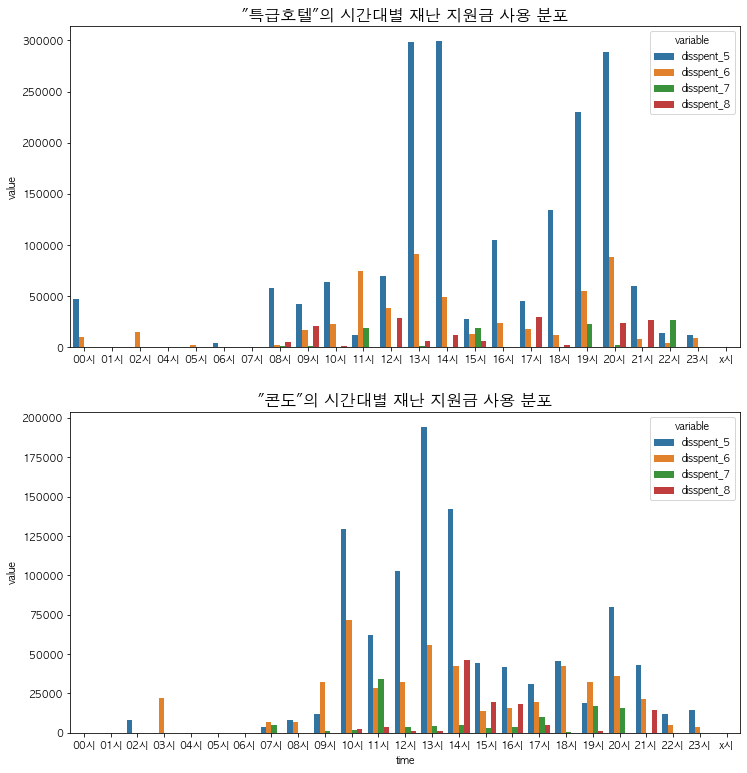

In [36]:
fig,axes = plt.subplots(2,1,figsize=(12,13))
fig_timevarying('특급호텔',var1,ax=axes[0],gtype='bar')
fig_timevarying('콘도',var1,ax=axes[1],gtype='bar')

axes[0].set_title('"특급호텔"의 시간대별 재난 지원금 사용 분포',{'fontsize':16})
axes[1].set_title('"콘도"의 시간대별 재난 지원금 사용 분포',{'fontsize':16})

axes[0].set_xlabel("")

plt.show()

: 이전 그림을 통해, 많은 재난지원금이 생활에 필수적인 부분에 대한 소비로 이어진 것을 확인하였습니다.

: 하지만, 개인적인 의견으로는 위와 같이 '재난지원금'의 목적과는 부합하지 않는 소비도 많이 있었다는 생각입니다.

## '일반한식' 업종의 규모(소상공인구분)별 재난지원금 비율
: "재난지원금이 업체 규모별로 어떻게 사용되었을까?"

In [37]:
order_dict = {'영세':0,'중소':1,'중소1':2,'중소2':3,'일반':4}

In [38]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
df1 = df1[df1['type'] == '일반한식'].drop(['type'],axis=1).set_index('franclass')

df_month_class = df1.apply(np.sum,axis=0)
tot_disspent_class = np.sum(df_month_class[:4])

tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1/tot_disspent_class  

tmp1 = tmp1.reset_index()
tmp1.columns = ['franclass','proportion']

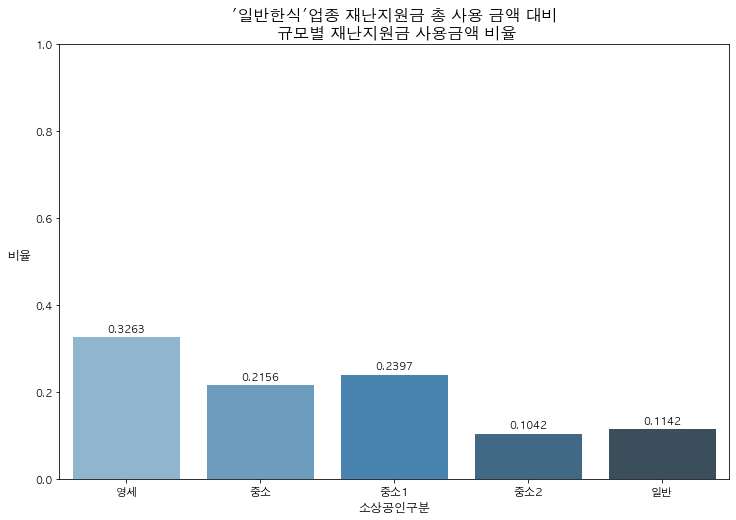

In [39]:
fig,ax = plt.subplots(figsize=(12,8))

sns.barplot(y=tmp1['proportion'],x=tmp1['franclass'], ax=ax, palette="Blues_d", order = ['영세','중소','중소1','중소2','일반'])

for i in range(len(tmp1)) : 
    height = tmp1['proportion'][i]
    ax.annotate(format(height,".4f"),xy=(order_dict[tmp1['franclass'][i]],height),xytext=(0, 3),
              textcoords="offset points",ha='center',va='bottom',fontsize=10)

ax.set_xlabel("소상공인구분",{'fontsize':12,'va':'top'})
ax.set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax.set_xticklabels(['영세','중소','중소1','중소2','일반'],{'fontsize':11})
ax.set_title(" '일반한식'업종 재난지원금 총 사용 금액 대비 \n 규모별 재난지원금 사용금액 비율",{'fontsize':16})
ax.set_ylim([0,1]);

: '일반한식'업종의 경우, '영세'사업장에서 가장 많은 재난지원금이 사용되었습니다.

## '슈퍼마켓' 업종의 규모(소상공인구분)별 재난지원금 비율
: 슈퍼마켓의 경우, '일반(대형)' 슈퍼마켓에서의 재난지원금 사용비율이 유독 높았습니다.

In [40]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
df1 = df1[df1['type'] == '슈퍼마켓'].drop(['type'],axis=1).set_index('franclass')

df_month_class = df1.apply(np.sum,axis=0)
tot_disspent_class = np.sum(df_month_class[:4])

tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1/tot_disspent_class  

tmp1 = tmp1.reset_index()
tmp1.columns = ['franclass','proportion']

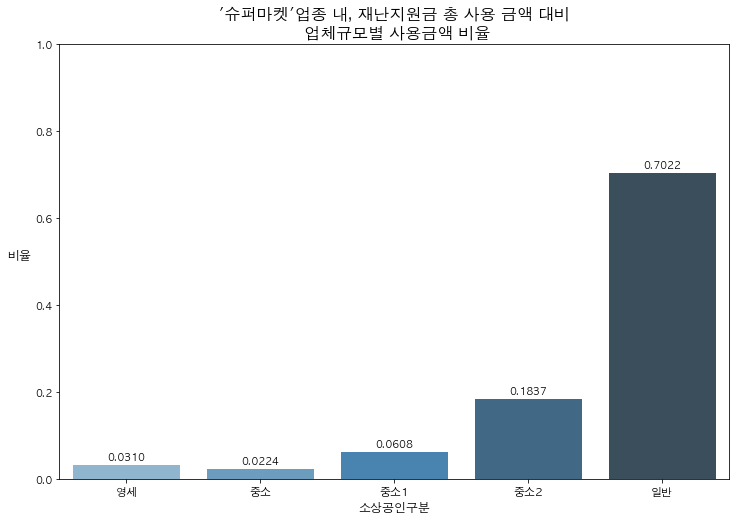

In [41]:
fig,ax = plt.subplots(figsize=(12,8))

sns.barplot(y=tmp1['proportion'],x=tmp1['franclass'], ax=ax, palette="Blues_d", order = ['영세','중소','중소1','중소2','일반'])

for i in range(len(tmp1)) : 
    height = tmp1['proportion'][i]
    ax.annotate(format(height,".4f"),xy=(order_dict[tmp1['franclass'][i]],height),xytext=(0, 3),
              textcoords="offset points",ha='center',va='bottom',fontsize=10)

ax.set_xlabel("소상공인구분",{'fontsize':12,'va':'top'})
ax.set_ylabel("비율",{'fontsize':12,'rotation':0,'ha':'right'})
ax.set_xticklabels(['영세','중소','중소1','중소2','일반'],{'fontsize':11})
ax.set_title(" '슈퍼마켓'업종 내, 재난지원금 총 사용 금액 대비 \n 업체규모별 사용금액 비율",{'fontsize':16})
ax.set_ylim([0,1]);

In [42]:
print("'영세' 슈퍼마켓 지점 수 : " ,(tmp[(tmp['type']=='슈퍼마켓')&(tmp['franclass']=='영세')])['point_x'].nunique())
print("'일반' 슈퍼마켓 지점 수 : " ,(tmp[(tmp['type']=='슈퍼마켓')&(tmp['franclass']=='일반')])['point_x'].nunique())

'영세' 슈퍼마켓 지점 수 :  201
'일반' 슈퍼마켓 지점 수 :  80


: 이에 대해서 확인해 본 결과, '영세' 슈퍼마켓의 지점수가 적어서 차이가 나는 것으로는 보이지 않았습니다. 추가적으로 고려해볼 수 있는 것은 '영세 슈퍼마켓에서의 카드사용 가능여부' 또는 '영세 슈퍼마켓에 대한 접근성', '영세 슈퍼마켓의 물품 종류 차이' 등을 고려해서 확인해봐도 좋다고 생각합니다.

## 특정 업종의 규모(소상공인구분)별 재난지원금 비율

In [43]:
@interact
def timevarying_plot2(Type=sorted(list(tmp['type'].unique()))
                     ):
    df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
    df1 = df1[df1['type'] == Type].drop(['type'],axis=1).set_index('franclass')
    df_month_class = df1.apply(np.sum,axis=0)
    tot_disspent_class = np.sum(df_month_class[:4])
    
    tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
    tmp1 = tmp1/tot_disspent_class  

    df = tmp1.reset_index()
    df.columns = ['franclass','proportion']
    df = df.sort_values(['franclass'])
    
    df.iplot(kind='bar', x='franclass', y='proportion',xTitle='소상공인구분',yTitle='재난지원금 사용금액 비율',
             title = f" '{Type}'의 총 재난지원금 사용금액 대비 규모별 비율 ", barmode='stack', colors=['blue']) 

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…